# CNN
## 1. Library, Data Preprocessing 
## 2. Solve classification with Pytorch
## 3. Show the result 

# Library

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision
import torchvision.transforms as transforms # for processing datasets
import torchvision.models as models

import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import os
from PIL import Image

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device: gpu") if torch.cuda.is_available() else print("device: cpu")

device: gpu


# Hyper parameter setting

In [2]:
# hypter parameter setting
learning_rate = 1e-3
training_epochs = 100
display_step = 10
batch_size = 128
activation = nn.ReLU()
max_pool = nn.MaxPool2d(2,2) # kernel size, stride size, padding size 
dropout_rate = 0.5

# Load data & Pre-process data

### Train & Validation data

In [3]:
trans = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])

In [4]:
# 구글 드라이브와 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dataset = torchvision.datasets.ImageFolder(root = '/content/drive/My Drive/GoIntern/예선/dataset/train', transform = trans) 
dataset.__getitem__(0)

(tensor([[[0.0000, 0.0000, 0.0039,  ..., 0.5255, 0.5569, 0.2627],
          [0.0000, 0.0000, 0.0000,  ..., 0.5294, 0.4627, 0.0902],
          [0.0000, 0.0000, 0.0000,  ..., 0.5020, 0.2314, 0.0118],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0039,  ..., 0.5804, 0.5569, 0.2549],
          [0.0000, 0.0000, 0.0000,  ..., 0.5922, 0.4588, 0.0824],
          [0.0000, 0.0000, 0.0000,  ..., 0.5412, 0.2157, 0.0078],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0039, 0.0078,  ..., 0.4784, 0.4549, 0.2196],
          [0.0000, 0.0000, 0.0039,  ..., 0.4824, 0.3882, 0.0784],
          [0.0000, 0.0000, 0.0000,  ...,

In [6]:
len(dataset)

16000

In [7]:
classes = dataset.classes
classes

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [8]:
# train:validation:test = 6:2:2
len(dataset)*(6/8), len(dataset)*(2/8) 

(12000.0, 4000.0)

len(train_data):  12000
len(val_data):  4000
data tensor([[[0.5137, 0.4824, 0.5765],
         [0.5137, 0.4824, 0.5765],
         [0.5098, 0.4784, 0.5725],
         ...,
         [0.5294, 0.4980, 0.5882],
         [0.5255, 0.4941, 0.5843],
         [0.5216, 0.4902, 0.5804]],

        [[0.5059, 0.4745, 0.5686],
         [0.5059, 0.4745, 0.5686],
         [0.5020, 0.4706, 0.5647],
         ...,
         [0.5255, 0.4941, 0.5843],
         [0.5294, 0.4980, 0.5882],
         [0.5255, 0.4941, 0.5843]],

        [[0.5020, 0.4706, 0.5647],
         [0.5020, 0.4706, 0.5647],
         [0.4980, 0.4667, 0.5608],
         ...,
         [0.5294, 0.4980, 0.5882],
         [0.5255, 0.4941, 0.5843],
         [0.5216, 0.4902, 0.5804]],

        ...,

        [[0.4118, 0.3804, 0.4706],
         [0.4196, 0.3843, 0.4745],
         [0.4235, 0.3843, 0.4784],
         ...,
         [0.4745, 0.4431, 0.5333],
         [0.4706, 0.4392, 0.5294],
         [0.4745, 0.4431, 0.5333]],

        [[0.4157, 0.3843, 0.4667

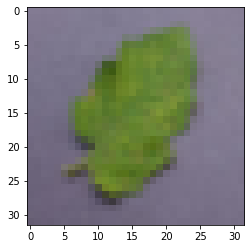

In [9]:
train_data, val_data = torch.utils.data.random_split(dataset, [int(len(dataset)*(6/8)), int(len(dataset)*(2/8))])

# check the data
print('len(train_data): ', len(train_data))
print('len(val_data): ', len(val_data))

x_train, y_train = train_data[0]
x_train = np.transpose(x_train, (1, 2, 0))

# 32 x 32 x 3

print('data', x_train)
print('data shape: ', x_train.shape)
print('label: ', y_train)

plt.figure()
plt.imshow(x_train)
plt.show()

In [52]:
# num_workers에 코어 절반 수 입력하기 위해 코어 수 확인
!cat /proc/cpuinfo |grep processor | wc -l

2


data shape: torch.Size([128, 3, 32, 32])
label: tensor([10, 14,  3, 17, 18,  7, 14,  9, 19,  2, 18, 17, 12,  1, 14, 16, 19,  2,
         4,  8, 13, 16, 13,  2,  7, 12,  5, 17,  3, 11, 12,  7,  8, 19,  6, 17,
        16,  5, 19,  1,  8, 12, 18, 12, 12, 12,  5,  5, 19, 12, 15, 10, 15, 14,
        17, 10,  2, 16, 14, 16,  3,  8,  0,  8,  3, 10,  7,  0, 13, 12,  5,  0,
         2,  9, 13,  4, 14,  7, 12, 17,  1, 11,  5,  8,  6,  6,  6, 15, 11,  0,
        13, 16, 16,  2, 14,  9,  5,  0, 16, 11,  0,  9, 18, 12, 12,  7,  7, 11,
         3,  7,  7,  8,  7, 14, 17, 12, 15, 15,  1,  7, 19, 15, 18, 18, 13,  9,
        16, 14])


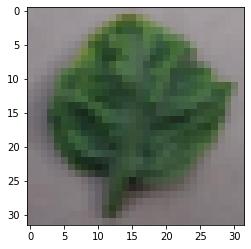

In [10]:
# Pre-process (batch, shuffle)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=1, drop_last=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True, num_workers=1, drop_last=True)

# check the data 
examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)

print('data shape:', example_data.shape)
print('label:', example_target)

check_image = example_data[0]
check_image = np.transpose(check_image, (1, 2, 0))

plt.figure()
plt.imshow(check_image)
plt.show()

### Test data

In [11]:
path_dir = '/content/drive/My Drive/GoIntern/예선/dataset/test'
file_list = os.listdir(path_dir)
file_list = [int(file.split('.')[0]) for file in file_list if file.endswith(".jpg")] # .jpg 파일만 리스트로 저장
file_list[:5], len(file_list)

([949, 953, 990, 989, 995], 3997)

In [12]:
# index 순서대로 리스트 정렬
file_list.sort()
file_list[:5]

[0, 1, 2, 3, 4]

In [13]:
file_list = [str(file) + '.jpg' for file in file_list]
file_list

['0.jpg',
 '1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '50.jpg',
 '51.jpg',
 '52.jpg',
 '53.jpg',
 '54.jpg',
 '55.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '60.jpg',
 '61.jpg',
 '62.jpg',
 '63.jpg',
 '64.jpg',
 '65.jpg',
 '66.jpg',
 '67.jpg',
 '68.jpg',
 '69.jpg',
 '70.jpg',
 '71.jpg',
 '72.jpg',
 '73.jpg',
 '74.jpg',
 '75.jpg',
 '76.jpg',
 '77.jpg',
 '78.jpg',
 '79.jpg',
 '80.jpg',
 '81.jpg',
 '82.jpg',
 '83.jpg',
 '84.jpg',
 '85.jpg',
 '86.jpg',
 '87.jpg',
 '88.jpg',
 '89.jpg',
 '90.jpg',
 '91.jpg'

In [14]:
file_list[-1]

'3996.jpg'

In [15]:
testset = []
for file in file_list:
    path = '/content/drive/My Drive/GoIntern/예선/dataset/test/{}'.format(file)
    image = Image.open(path)
    testset.append(image)
testset[0], len(testset)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7F58579A9D68>,
 3997)

In [16]:
trans = transforms.Compose([transforms.Resize(32), transforms.ToTensor()]) 

In [17]:
class CustomDataset(torch.utils.data.Dataset): 
    def __init__(self, transform):
        self.x_data = testset
        self.transform = transform
        
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, idx): 
        if torch.is_tensor(idx):
            idx = idx.tolist()
        x = self.x_data[idx]
        if self.transform:
            x = self.transform(x)
        return x

In [18]:
test_data = CustomDataset(trans)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=1)

In [19]:
# check the data 
examples = enumerate(test_loader)
batch_idx, example_data = next(examples)

print('data shape:', example_data.shape)

data shape: torch.Size([128, 3, 32, 32])


In [20]:
print(test_data.__getitem__(0))
print(test_data.__getitem__(0).shape)

tensor([[[0.0000, 0.0000, 0.1686,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.2078,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.1882,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.4392, 0.3843, 0.3843,  ..., 0.0000, 0.0000, 0.0000],
         [0.4784, 0.3961, 0.3333,  ..., 0.0000, 0.0000, 0.0000],
         [0.4000, 0.3765, 0.3686,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.1922,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.2314,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.2118,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.4667, 0.4510, 0.4196,  ..., 0.0000, 0.0000, 0.0000],
         [0.4706, 0.4275, 0.4000,  ..., 0.0000, 0.0000, 0.0000],
         [0.4314, 0.3922, 0.3569,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.1686,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.2078,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.1882,  ..., 0.0000, 0.0000, 0.

In [21]:
test_data.__len__

<bound method CustomDataset.__len__ of <__main__.CustomDataset object at 0x7f5856b49a20>>

In [22]:
test_data[0].shape

torch.Size([3, 32, 32])

# Model & Optimization and Loss function

### VGG 19

In [23]:
class VGG19(nn.Module):
    def __init__(self):
        super().__init__() # for initializing nn.Module (parent class)
        self.feature_extraction = nn.Sequential(
            
            # 3 x 32 x 32
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.Dropout(dropout_rate),
            activation,
            nn.Conv2d(64, 64, 3, padding=1), 
            nn.BatchNorm2d(64),
            activation,        
            max_pool,
            
            # 64 x 16 x 16
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.Dropout(dropout_rate),
            activation,
            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            activation,
            max_pool,
            
            # 128 x 8 x 8
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.Dropout(dropout_rate),
            activation,
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.Dropout(dropout_rate),
            activation,
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            activation,
            max_pool,
            
            # 256 x 4 x 4
            nn.Conv2d(256, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.Dropout(dropout_rate),
            activation,
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.Dropout(dropout_rate),
            activation,
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            activation,
            max_pool,
            
            # 512 x 2 x 2
            
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.Dropout(dropout_rate),
            activation,
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.Dropout(dropout_rate),
            activation,
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.Dropout(dropout_rate),
            activation,
            max_pool,
            
            # 512 x 1 x 1
        )
        self.classifier = nn.Sequential(
            nn.Linear(512, 100),
            nn.Dropout(dropout_rate),
            activation,
            nn.Linear(100, 50),
            activation,
            nn.Linear(50, 20),
        )
    def forward(self, x):
        extracted_feature = self.feature_extraction(x)
        flatten = extracted_feature.view(extracted_feature.size(0), -1)
        result = self.classifier(flatten)
        return result

model = VGG19().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Resnet 152

In [24]:
# model = models.resnet152().to(device)
# model.train()
# loss_function = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train & Validate

In [25]:
loss_array = []

# train the model
for i in range(training_epochs):
    for index, [data, label] in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
        
        # hypothesis
        output = model(data)
        
        # cost
        loss = loss_function(output, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if i % display_step == 0:
        print('{} epoch loss: {}'.format(i,loss))
        loss_array.append(loss.cpu().detach().numpy())

0 epoch loss: 2.646428108215332
10 epoch loss: 1.0541930198669434
20 epoch loss: 0.41397392749786377
30 epoch loss: 0.2166994959115982
40 epoch loss: 0.13163597881793976
50 epoch loss: 0.12842321395874023
60 epoch loss: 0.04440240561962128
70 epoch loss: 0.054329030215740204
80 epoch loss: 0.04656282812356949
90 epoch loss: 0.10672099143266678


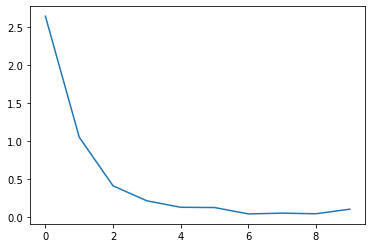

In [26]:
plt.figure()
plt.plot(loss_array)
plt.show()

### Accuracy

In [27]:
# validate the model
model.eval()
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for index, [data, label] in enumerate(val_loader):
        data = data.to(device)
        label = label.to(device)
        
        output = model.forward(data)
        _, prediction_index = torch.max(output, 1)
        
        prediction_list.append(prediction_index)
        label_list.append(label)
        
        total += label.size(0)
        correct += (prediction_index == label).sum().float()
        
        val_accuracy = correct/total

print("Validation accuraccy: {}".format(val_accuracy))

Validation accuraccy: 0.7346270084381104


In [28]:
len(prediction_list), len(label_list)

(31, 31)

In [29]:
y_pred = []
for prediction in prediction_list:
    prediction = prediction.tolist()
    y_pred += prediction
y_pred[:10]

[1, 12, 5, 11, 9, 2, 9, 18, 19, 12]

In [30]:
y_true = []
for label in label_list:
    label = label.tolist()
    y_true += label
y_true[:10]

[1, 12, 5, 8, 9, 2, 8, 16, 19, 12]

### F1 score

In [31]:
# 'macro' : multiclass + data balance
metrics.f1_score(y_true, y_pred, average='macro')

0.7361855195962932

# Model save

In [32]:
# save
torch.save(model.state_dict(), 'VGG19.pth')

In [33]:
# model load test
new_model = VGG19().to(device)
new_model.load_state_dict(torch.load('VGG19.pth'))

new_model.eval()
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for index, [data, label] in enumerate(val_loader):
        data = data.to(device)
        label = label.to(device)
        
        output = new_model.forward(data)
        _, prediction_index = torch.max(output, 1)
        
        prediction_list.append(prediction_index)
        label_list.append(label)
        
        total += label.size(0)
        correct += (prediction_index == label).sum().float()
        
        val_accuracy = correct/total

print("Validation accuraccy: {}".format(val_accuracy))

Validation accuraccy: 0.7336189150810242


In [34]:
# load
model = VGG19().to(device)
model.load_state_dict(torch.load('VGG19.pth'))

<All keys matched successfully>

# Test

In [38]:
# test the model
model.eval()
prediction_list = []

with torch.no_grad():
    for index, data in enumerate(test_loader):
        data = data.to(device)
        
        output = model(data)
        _, prediction_index = torch.max(output, 1)
        
        prediction_list.append(prediction_index)

prediction_list[0]

tensor([ 1,  1, 12, 13, 14, 15, 17, 11,  6,  2,  3,  4,  6,  6,  7,  8,  9, 10,
        11, 16,  0,  1, 12, 13, 14, 15, 17, 18, 19,  2, 11,  4,  5,  6, 16, 11,
        11, 10, 11, 16,  0,  1, 12, 13, 14, 15,  2, 18, 19,  2, 11, 11,  4,  6,
         2,  8,  9, 10, 11,  5,  0,  1, 12, 13, 14, 15, 17, 18, 19,  2, 11,  4,
         6,  6,  7,  8, 11, 10, 11, 16,  0,  1, 12, 12, 14, 15,  2, 18, 19,  2,
        11, 11,  5,  6, 16,  8, 11, 10, 11, 16,  0,  1, 12, 12, 14, 15, 17, 18,
        19,  2,  1,  4,  4,  6,  6,  8,  2, 10, 11, 16,  0,  1, 12, 13, 14,  4,
         2, 18], device='cuda:0')

In [39]:
len(prediction_list)

32

### Save test.tsv to sub.tsv

In [40]:
y_pred_test = []
for prediction in prediction_list:
    prediction = prediction.tolist()
    y_pred_test += prediction
y_pred_test[:3], len(y_pred_test)

([1, 1, 12], 3997)

In [41]:
y_pred_test[128:]

[19,
 2,
 1,
 4,
 5,
 6,
 7,
 11,
 11,
 4,
 11,
 6,
 0,
 1,
 12,
 13,
 6,
 15,
 17,
 18,
 19,
 2,
 11,
 4,
 4,
 6,
 2,
 8,
 9,
 15,
 11,
 10,
 6,
 1,
 12,
 13,
 14,
 15,
 2,
 19,
 19,
 2,
 3,
 11,
 6,
 6,
 3,
 11,
 9,
 6,
 11,
 6,
 0,
 1,
 12,
 13,
 6,
 15,
 2,
 19,
 11,
 2,
 11,
 4,
 6,
 11,
 4,
 8,
 11,
 10,
 11,
 15,
 0,
 1,
 12,
 13,
 3,
 15,
 2,
 18,
 2,
 2,
 1,
 4,
 6,
 11,
 6,
 8,
 9,
 10,
 11,
 16,
 0,
 1,
 12,
 13,
 14,
 15,
 5,
 18,
 19,
 2,
 3,
 4,
 5,
 19,
 6,
 8,
 9,
 10,
 11,
 17,
 0,
 1,
 12,
 13,
 3,
 15,
 17,
 18,
 19,
 2,
 3,
 11,
 5,
 6,
 6,
 11,
 11,
 4,
 11,
 8,
 0,
 1,
 12,
 12,
 3,
 15,
 2,
 18,
 19,
 2,
 3,
 4,
 4,
 6,
 7,
 8,
 11,
 10,
 11,
 18,
 0,
 1,
 12,
 13,
 14,
 15,
 2,
 18,
 19,
 2,
 11,
 4,
 11,
 11,
 6,
 8,
 11,
 10,
 11,
 16,
 3,
 1,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 2,
 11,
 4,
 4,
 6,
 8,
 8,
 11,
 10,
 11,
 17,
 0,
 1,
 12,
 6,
 14,
 15,
 2,
 18,
 19,
 2,
 11,
 4,
 4,
 6,
 7,
 11,
 11,
 10,
 11,
 19,
 0,
 1,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 9

In [42]:
cls = {(3,5):0,(3,20):1,(4,2):2,(4,7):3,(4,11):4,(5,8):5,(7,1):6,
       (7,20):7,(8,6):8,(8,9):9,(10,20):10,(11,14):11,(13,1):12,
       (13,6):13,(13,9):14,(13,15):15,(13,16):16,(13,17):17,(13,18):18,(13,20):19}

In [43]:
inv_cls = {v: k for k, v in cls.items()}
inv_cls

{0: (3, 5),
 1: (3, 20),
 2: (4, 2),
 3: (4, 7),
 4: (4, 11),
 5: (5, 8),
 6: (7, 1),
 7: (7, 20),
 8: (8, 6),
 9: (8, 9),
 10: (10, 20),
 11: (11, 14),
 12: (13, 1),
 13: (13, 6),
 14: (13, 9),
 15: (13, 15),
 16: (13, 16),
 17: (13, 17),
 18: (13, 18),
 19: (13, 20)}

In [46]:
new_line_list = []
with open('/content/drive/My Drive/GoIntern/예선/dataset/test/test.tsv', 'r') as f:
    line = f.readline()
    for pred in y_pred_test:
        if not line:
            break
        # print("pred:", pred)
        for classify_class in inv_cls.keys():
            # print("classify_class:", classify_class)
            if pred == classify_class:
                plant_label, disease_label = inv_cls[classify_class]
                new_line = '{}\t{}\t{}\n'.format(line.rstrip(), plant_label, disease_label)
                print("new_line:", new_line)
                new_line_list.append(new_line)
                line = f.readline()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
new_line: 1497.jpg	7	1

new_line: 1498.jpg	11	14

new_line: 1499.jpg	13	16

new_line: 1500.jpg	3	20

new_line: 1501.jpg	3	20

new_line: 1502.jpg	13	1

new_line: 1503.jpg	13	6

new_line: 1504.jpg	13	9

new_line: 1505.jpg	13	15

new_line: 1506.jpg	4	2

new_line: 1507.jpg	13	18

new_line: 1508.jpg	13	20

new_line: 1509.jpg	4	2

new_line: 1510.jpg	4	7

new_line: 1511.jpg	11	14

new_line: 1512.jpg	4	11

new_line: 1513.jpg	7	1

new_line: 1514.jpg	8	9

new_line: 1515.jpg	8	6

new_line: 1516.jpg	8	9

new_line: 1517.jpg	8	6

new_line: 1518.jpg	11	14

new_line: 1519.jpg	13	16

new_line: 1520.jpg	3	5

new_line: 1521.jpg	3	20

new_line: 1522.jpg	13	1

new_line: 1523.jpg	13	6

new_line: 1524.jpg	13	9

new_line: 1525.jpg	4	11

new_line: 1526.jpg	13	17

new_line: 1527.jpg	13	18

new_line: 1528.jpg	13	20

new_line: 1529.jpg	3	20

new_line: 1530.jpg	11	14

new_line: 1531.jpg	4	11

new_line: 1532.jpg	7	1

new_line: 1533.jpg	7	1

new_line: 1534.jpg	7	1

new_line: 1535.

In [47]:
new_line_list[-1]

'3996.jpg\t11\t14\n'

In [48]:
len(new_line_list)

3997

In [50]:
with open('/content/drive/My Drive/GoIntern/예선/dataset/test/sub_vgg19.tsv', 'w') as f:
    for new_line in new_line_list:
        f.write(new_line)

In [51]:
# file_name_list = []
# plant_label_list = []
# disease_label_list = []

# with open('./dataset/test/sub_resnet152.tsv', 'r') as f:
#     while True:
#         line = f.readline()
#         if not line:
#             break
        
#         line = line.rstrip()
            
#         file_name = line.split('\t')[0]
#         file_name_list.append(file_name)

#         plant_label = line.split('\t')[1]
#         plant_label_list.append(plant_label)

#         disease_label = line.split('\t')[2]
#         disease_label_list.append(disease_label)
# print(file_name_list[:3], plant_label_list[:3], disease_label_list[:3])
# print(len(file_name_list), len(plant_label_list), len(disease_label_list))

In [ ]:
import pandas as pd

sub = pd.DataFrame({'file_name': file_name_list,
             'plant_label': plant_label_list,
             'disease_label': disease_label_list})
sub.head()

,file_name,plant_label,disease_label
0,0.jpg,3,5
1,1.jpg,3,20
2,2.jpg,13,1
3,3.jpg,13,6
4,4.jpg,13,9


In [ ]:
sub.to_csv('./dataset/test/sub_pd.tsv', header = False, index=False, sep='\t') 